## Oasis Internship Task - 3 
## Car Price Prediction 
##### by Dhyey Sampat <br><br>
Importing required modules for analysis


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
df = pd.read_csv('carprice.csv')
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
188,189,2,volkswagen dasher,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995.0
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
142,143,0,subaru brz,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82,4400,28,33,7775.0
122,123,1,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,93.7,...,98,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.0
50,51,1,maxda rx3,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195.0


Checking for null values.

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Performing EDA and Feature selection/extraction

<AxesSubplot:>

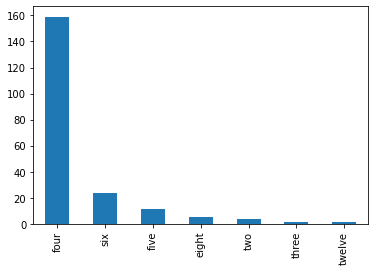

In [4]:
df['cylindernumber'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='doornumber'>

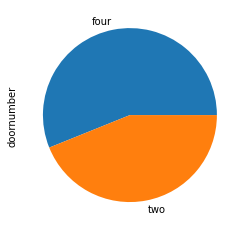

In [5]:
df['doornumber'].value_counts().plot(kind='pie')

In [6]:
df['cylindernumber'] = df['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [7]:
df['doornumber'] = df['doornumber'].replace({'two':2,'four':4})

In [8]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [9]:
df['fueltype'] = df['fueltype'].replace({'gas':1,'diesel':2})

<AxesSubplot:ylabel='aspiration'>

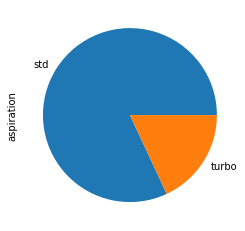

In [10]:
df['aspiration'].value_counts().plot(kind='pie')

In [11]:
df['aspiration'] = df['aspiration'].replace({'std':1,'turbo':2})

<AxesSubplot:xlabel='carbody', ylabel='Density'>

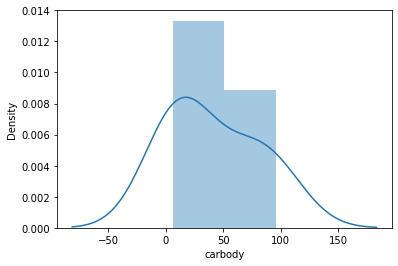

In [12]:
sns.distplot(df['carbody'].value_counts())

In [13]:
df['carbody'] = df['carbody'].replace({'sedan':1,'hatchback':2, 'wagon':3,'hardtop':4,'convertible':5})

<AxesSubplot:>

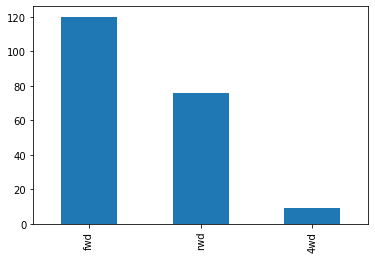

In [14]:
df['drivewheel'].value_counts().plot(kind='bar')

In [15]:
df['drivewheel'] = df['drivewheel'].replace({'fwd':1,'rwd':2, '4wd':1})

<AxesSubplot:ylabel='enginelocation'>

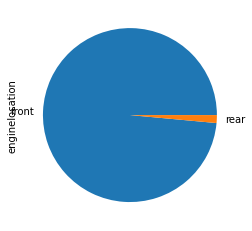

In [16]:
df['enginelocation'].value_counts().plot(kind='pie')

In [17]:
df.drop(columns=['enginelocation'],inplace=True)

<AxesSubplot:>

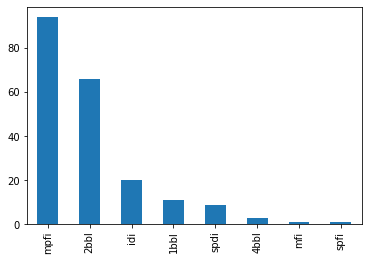

In [18]:
df['fuelsystem'].value_counts().plot(kind='bar')

In [19]:
df['fuelsystem'] = df['fuelsystem'].replace({'mpfi':1,'2bbl':2,'idi':3, '1bbl':4, 'spdi':5, '4bbl':6, 'mfi':7, 'spfi':8})

<AxesSubplot:>

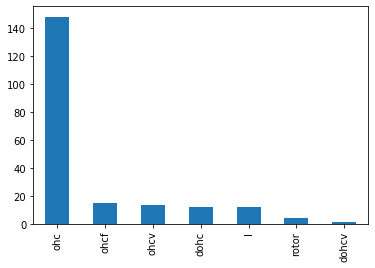

In [20]:
df['enginetype'].value_counts().plot(kind='bar')

In [21]:
df['enginetype'] = df['enginetype'].replace({'ohc':1,'ohcf':2,'ohcv':3, 'dohc':4, 'l':5, 'rotor':6, 'dohcv':7})

In [22]:
df['CarName']=df['CarName'].apply(lambda x: x.split()[0])

In [23]:
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [24]:
df['CarName'] = df['CarName'].replace({'maxda':'mazda', 'porcshce':'porsche', 'Nissan':'nissan', 'vokswagen': 'volkswagen', 'toyouta': 'toyota', 'vw':'volkswagen'})

In [25]:
df['CarName'] = df['CarName'].replace({'toyota':1,'nissan':2,'mazda':3, 'honda':4, 'mitsubishi':5, 'subaru':6, 'volvo':7, 'peugeot':8, 'volkswagen':9, 'dodge':10, 'bmw':11, 'buick':12, 'audi':13, 'plymouth':14, 'saab':15, 'porsche':16, 'isuzu':17, 'chevrolet':18, 'alfa-romero':19, 'jaguar':20, 'renault':21, 'mercury':22})

Splitting features and label

In [26]:
x =df.drop(columns = 'price')
y = df['price']

Displaying heatmap to show the correlation between features and label

<AxesSubplot:>

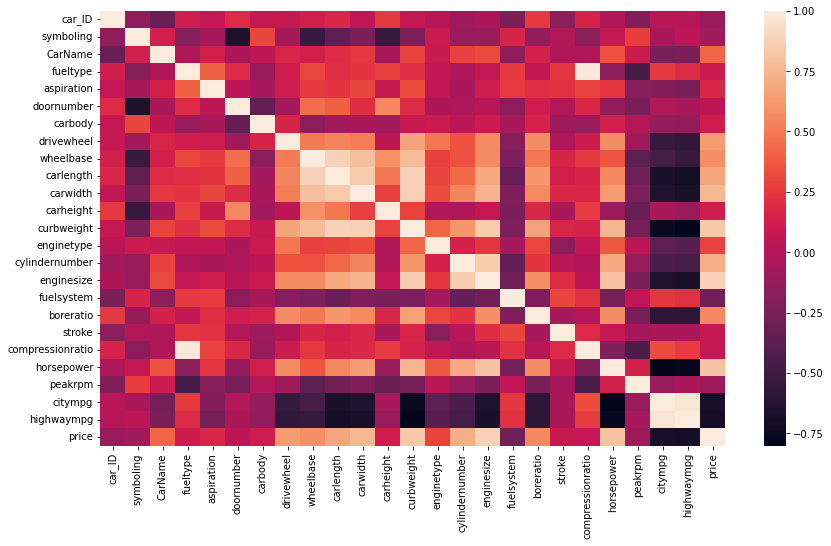

In [27]:
corr = df.corr()
plt.subplots(figsize=(14,8))
sns.heatmap(corr)

## Linear Regression
<br>
Importing modules for regression

In [28]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 

Scaling the data

In [29]:
Xs = scale(x)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(Xs, y, test_size=0.25, random_state=42) 
Coef=LinearRegression() 
Coef.fit(X_train, Y_train) 
Y_pred = Coef.predict(X_test) 

Checking accuracy `

In [31]:
print('Accuracy: %.2f' % r2_score(Y_test, Y_pred)) 

Accuracy: 0.87
